# Portoguese wine dataset: CART and Cubist algorithms
The following exercise is taken from <b> Machine Learning with R</b> by <b> Brett Lantz </b> (Third Edition)

The dataset used in the exercise is the <b>Portoguese wine</b> dataset. The dataset was orginainally published in a study by <b>Cortez, Cerdeira, Almeida, Matos & Reis</b> in 2009, comparing different machine learning techniques. The dataset here is downloaded from the textbook's github page. The dataset is also freely available at <b>UCI Machine Learning Repository</b>.

## Step 1: Collecting data


In [1]:
wine <- read.csv("https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter06/whitewines.csv")

## Step 2: Exploring and preparing the data

In [3]:
str(wine)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  6.7 5.7 5.9 5.3 6.4 7 7.9 6.6 7 6.5 ...
 $ volatile.acidity    : num  0.62 0.22 0.19 0.47 0.29 0.14 0.12 0.38 0.16 0.37 ...
 $ citric.acid         : num  0.24 0.2 0.26 0.1 0.21 0.41 0.49 0.28 0.3 0.33 ...
 $ residual.sugar      : num  1.1 16 7.4 1.3 9.65 0.9 5.2 2.8 2.6 3.9 ...
 $ chlorides           : num  0.039 0.044 0.034 0.036 0.041 0.037 0.049 0.043 0.043 0.027 ...
 $ free.sulfur.dioxide : num  6 41 33 11 36 22 33 17 34 40 ...
 $ total.sulfur.dioxide: num  62 113 123 74 119 95 152 67 90 130 ...
 $ density             : num  0.993 0.999 0.995 0.991 0.993 ...
 $ pH                  : num  3.41 3.22 3.49 3.48 2.99 3.25 3.18 3.21 2.88 3.28 ...
 $ sulphates           : num  0.32 0.46 0.42 0.54 0.34 0.43 0.47 0.47 0.47 0.39 ...
 $ alcohol             : num  10.4 8.9 10.1 11.2 10.9 ...
 $ quality             : int  5 6 6 4 6 6 6 6 6 7 ...


In [5]:
summary(wine)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

- One of the advantages of trees is that they can handle many types of data without preprocessing
- This means that normalization or standardization are not neccessary
- However, evaluating the distribution is required!

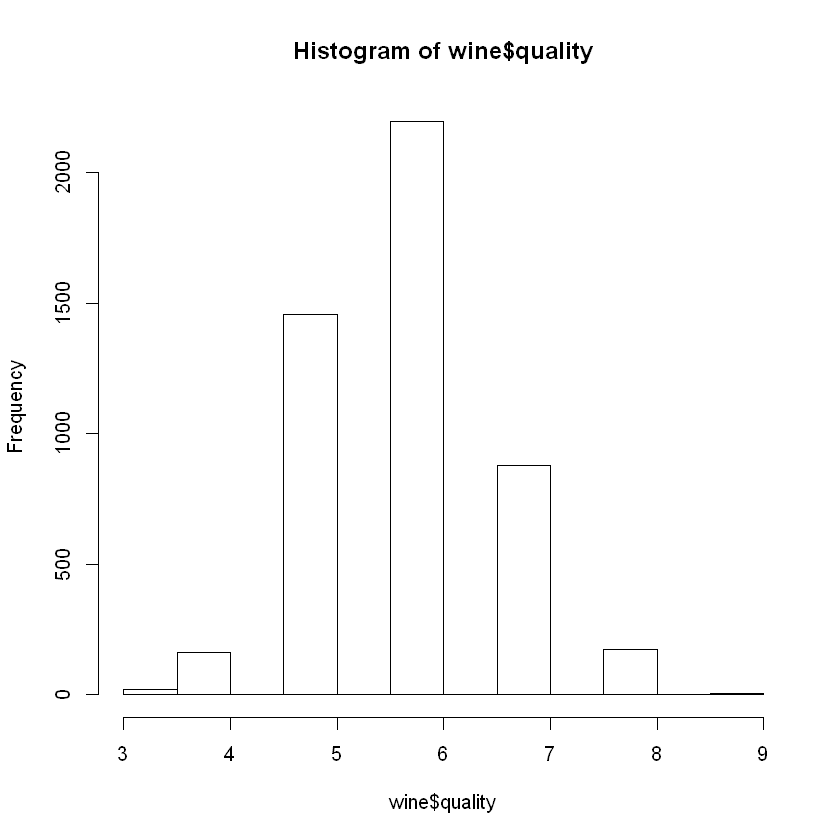

In [4]:
hist(wine$quality)

In [8]:
# wine dataset is sorted randomly, therefore no random sampling required, dividing the dataset at roughly 75%
wine_train <- wine[1:3750, ]
wine_test <- wine[3751:4898, ]

## Step 3: Training a model on the data

In [10]:
library(rpart)
m.rpart <- rpart(quality ~ ., wine_train)
m.rpart

Warning message:
"package 'rpart' was built under R version 3.6.3"


n= 3750 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3750 2945.53200 5.870933  
   2) alcohol< 10.85 2372 1418.86100 5.604975  
     4) volatile.acidity>=0.2275 1611  821.30730 5.432030  
       8) volatile.acidity>=0.3025 688  278.97670 5.255814 *
       9) volatile.acidity< 0.3025 923  505.04230 5.563380 *
     5) volatile.acidity< 0.2275 761  447.36400 5.971091 *
   3) alcohol>=10.85 1378 1070.08200 6.328737  
     6) free.sulfur.dioxide< 10.5 84   95.55952 5.369048 *
     7) free.sulfur.dioxide>=10.5 1294  892.13600 6.391036  
      14) alcohol< 11.76667 629  430.11130 6.173291  
        28) volatile.acidity>=0.465 11   10.72727 4.545455 *
        29) volatile.acidity< 0.465 618  389.71680 6.202265 *
      15) alcohol>=11.76667 665  403.99400 6.596992 *

- alcohol was used first, hence it is the single most important predictor of quality
- nodes with a * are terminal, which means they result in a prediction

### Visualizing decision trees

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"


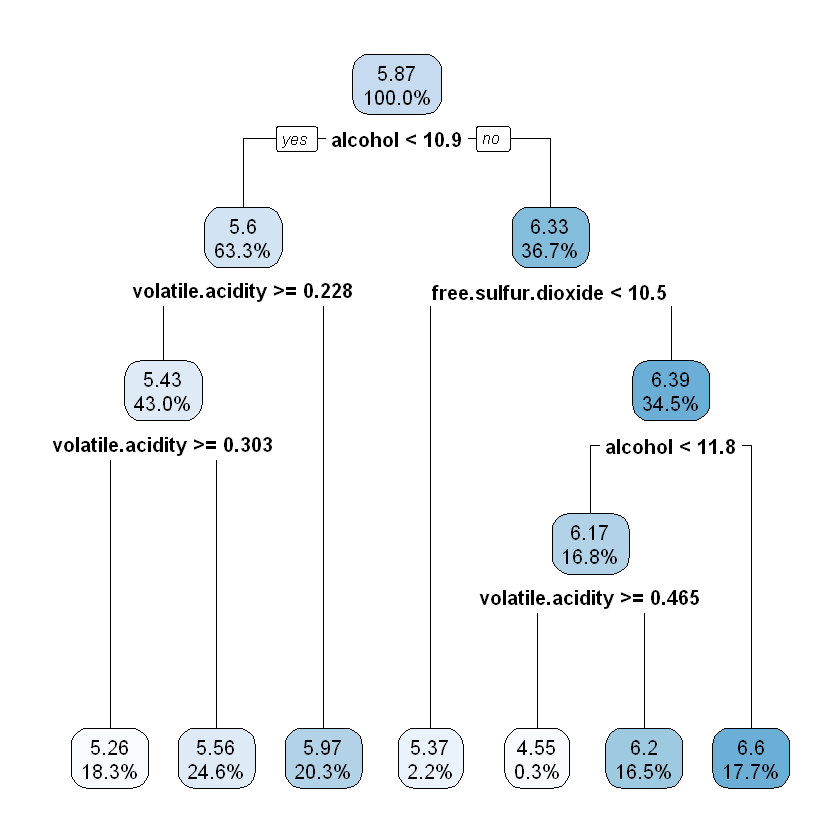

In [12]:
library(rpart.plot)
rpart.plot(m.rpart, digits = 3)

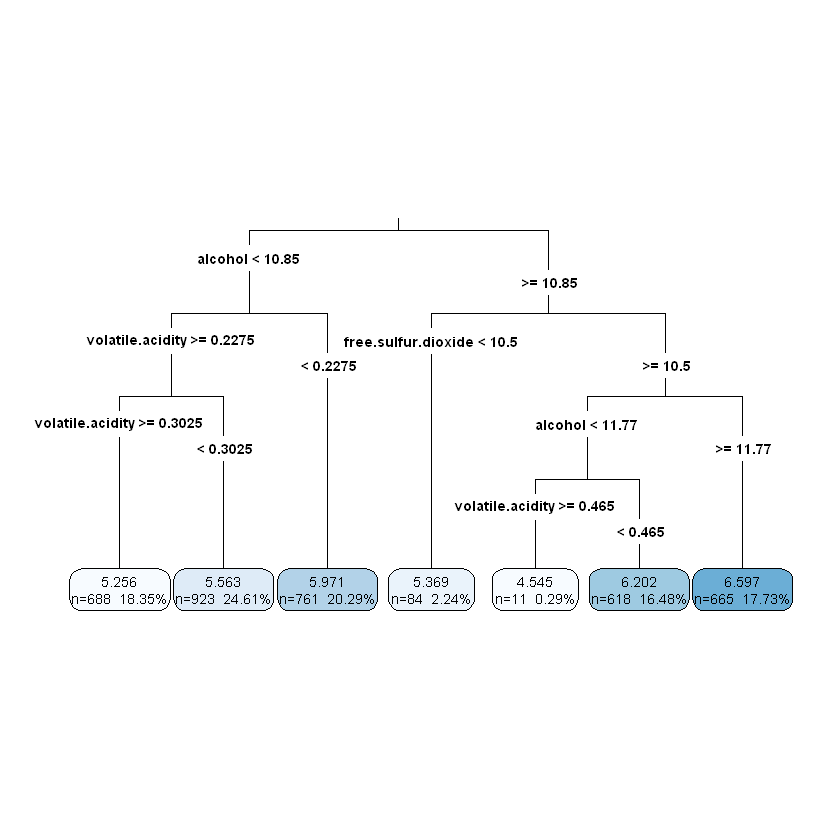

In [13]:
rpart.plot(m.rpart, digits = 4, fallen.leaves = T, type = 3, extra = 101)

## Step 4: Evaluating model performance

In [17]:
p.rpart <- predict(m.rpart, wine_test)
summary(p.rpart)
summary(wine_test$quality)

# correleation between predicted and actual labels is a good criteria for model performance
cor(p.rpart, wine_test$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.545   5.563   5.971   5.893   6.202   6.597 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.901   6.000   9.000 

[1] 0.5369525

- The model generally performs fairly well on the values between the 1st and the 3rd quartile
- however, it does not predict the extreme values
- a ~0.5 correlation is not too bad, but it does not really reflect the precision of the predictions

### Measuring performance wih the mean absolute error

In [20]:
# Using mean absoute error to evaluate the performance

MAE <- function(actual, predicted) {
    mean(abs(actual - predicted))
}

MAE(wine_test$quality, p.rpart)

[1] 0.5872652

- On average, the difference between the model's predictions and the actual values was 0.59

## Step 5: Improving model performance

In [25]:
library(Cubist)
m.cubist <- cubist(wine_train[-12], wine_train$quality)
m.cubist
summary(m.cubist)


Call:
cubist.default(x = wine_train[-12], y = wine_train$quality)

Number of samples: 3750 
Number of predictors: 11 

Number of committees: 1 
Number of rules: 25 



Call:
cubist.default(x = wine_train[-12], y = wine_train$quality)


Cubist [Release 2.07 GPL Edition]  Tue Aug 11 15:03:57 2020
---------------------------------

    Target attribute `outcome'

Read 3750 cases (12 attributes) from undefined.data

Model:

  Rule 1: [21 cases, mean 5.0, range 4 to 6, est err 0.5]

    if
	free.sulfur.dioxide > 30
	total.sulfur.dioxide > 195
	total.sulfur.dioxide <= 235
	sulphates > 0.64
	alcohol > 9.1
    then
	outcome = 573.6 + 0.0478 total.sulfur.dioxide - 573 density
	          - 0.788 alcohol + 0.186 residual.sugar - 4.73 volatile.acidity

  Rule 2: [28 cases, mean 5.0, range 4 to 8, est err 0.7]

    if
	volatile.acidity > 0.31
	citric.acid <= 0.36
	residual.sugar <= 1.45
	total.sulfur.dioxide <= 97
	alcohol > 9.1
    then
	outcome = 168.2 + 4.75 citric.acid + 0.0123 total.sulfur.dioxide
	          - 170 density + 0.057 residual.sugar - 6.4 chlorides + 0.84 pH
	          + 0.14 fixed.acidity

  Rule 3: [171 cases, mean 5.1, range 3 to 6, est err 0

In [26]:
p.cubist <- predict(m.cubist, wine_test)
summary(p.cubist)
cor(p.cubist, wine_test$quality)
MAE(p.cubist, wine_test$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.677   5.416   5.906   5.848   6.238   7.393 

[1] 0.6201015

[1] 0.5339725